## Challenge 0

In [ ]:
  ! /anaconda/envs/py35/bin/python -m pip freeze
  ! /anaconda/envs/py35/bin/python -m pip --version

In [2]:
import sys
sys.version

'3.5.4 |Anaconda custom (64-bit)| (default, Nov 20 2017, 18:44:38) \n[GCC 7.2.0]'

## Challenge 1

!/anaconda/envs/py35/bin/python -m pip install azure-cognitiveservices-vision-customvision

In [13]:
from azure.cognitiveservices.vision.customvision.training import training_api
from azure.cognitiveservices.vision.customvision.training.models import ImageUrlCreateEntry

# Replace with a valid key
# training_key = "002daf2d58764643bc5ce80f07b8fe5e"
prediction_key = "e888f1f118ed4d97bcae18c3a0615138"

# trainer = training_api.TrainingApi(training_key)

# # Create a new project
# print ("Creating project...")
# project = trainer.create_project("C1 Project")

hardshell_jackets = trainer.create_tag("6825ec3f-cf70-45e9-a42e-27826339806f", "hardshell jackets")
insulated_jackets = trainer.create_tag("6825ec3f-cf70-45e9-a42e-27826339806f", "insulated jackets")

hardshell_jackets
insulated_jackets 

In [ ]:
### Alternatively, if the images were on disk in a folder called Images alongside the sample.py, then
# they can be added by using the following:
#
import os
hardshell_jackets = "gear_images/hardshell_jackets"
for image in os.listdir(os.fsencode("gear_images/hardshell_jackets")):
   with open(hardshell_jackets + "/" + os.fsdecode(image), mode="rb") as img_data: 
       trainer.create_images_from_data(project.id, img_data, [hardshell_jackets.id ])

insulated_jackets = "gear_images/insulated_jackets"
for image in os.listdir(os.fsencode("gear_images/insulated_jackets")):
   with open(cherry_dir + "/" + os.fsdecode(image), mode="rb") as img_data: 
       trainer.create_images_from_data(project.id, img_data, [insulated_jackets.id ])

In [ ]:
import time

print ("Training...")
iteration = trainer.train_project(project.id)
while (iteration.status != "Completed"):
    iteration = trainer.get_iteration(project.id, iteration.id)
    print ("Training status: " + iteration.status)
    time.sleep(1)

### The iteration is now trained. Make it the default project endpoint
trainer.update_iteration(project.id, iteration.id, is_default=True)
print ("Done!")

## Get and use the default prediction endpoint

In [ ]:
from azure.cognitiveservices.vision.customvision.training import training_api
from azure.cognitiveservices.vision.customvision.training.models import ImageUrlCreateEntry

# Replace with a valid key
# training_key = "002daf2d58764643bc5ce80f07b8fe5e"
prediction_key = "e888f1f118ed4d97bcae18c3a0615138"

# trainer = training_api.TrainingApi(training_key)

# # Create a new project
# print ("Creating project...")
# project = trainer.create_project("C1 Project")

In [ ]:
from azure.cognitiveservices.vision.customvision.prediction import prediction_endpoint
from azure.cognitiveservices.vision.customvision.prediction.prediction_endpoint import models

# Now there is a trained endpoint that can be used to make a prediction

predictor = prediction_endpoint.PredictionEndpoint(prediction_key)


base_image_url = "https://image.sportsmansguide.com/adimgs/l/6/698102m3_ts.jpg"

# test_img_url = base_image_url + "gear_images/Test_images/test_image.jpg"
# results = predictor.predict_image_url(project.id, iteration.id, url=test_img_url)

# Alternatively, if the images were on disk in a folder called Images alongside the sample.py, then
# they can be added by using the following.
#
# Open the sample image and get back the prediction results.
with open("gear_images/Test_images/test_image.jpg", mode="rb") as test_data:
    results = predictor.predict_image("e888f1f118ed4d97bcae18c3a0615138", test_data)

# Display the results.
for prediction in results.predictions:
    print ("\t" + prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100))

## Challenge 2

In [ ]:
!unzip gear_images.zip

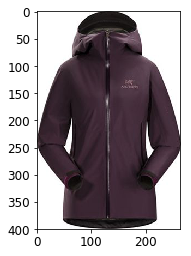

In [91]:
from PIL import Image, ImageOps

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread("gear_images/hardshell_jackets/10184184x1061637_zm.jpeg"))

desired_size = 128
im_pth = "gear_images/hardshell_jackets/10184184x1061637_zm.jpeg"

im = Image.open(im_pth)
old_size = im.size  # old_size[0] is in (width, height) format

ratio = float(desired_size)/max(old_size)
new_size = tuple([int(x*ratio) for x in old_size])
# use thumbnail() or resize() method to resize the input image

# thumbnail is a in-place operation

# im.thumbnail(new_size, Image.ANTIALIAS)

im = im.resize(new_size, Image.ANTIALIAS)
# create a new image and paste the resized on it

new_im = Image.new("RGB", (desired_size, desired_size), color='White')
new_im.paste(im, ((desired_size-new_size[0])//1,
                    (desired_size-new_size[1])//1))

new_im.show()
new_im.save('gear_images/hardshell_jackets/10184184x1061637_zm_new.jpeg')

In [ ]:
import numpy as np
from PIL import Image
    
def normalize(img , debug=False):
    """
    Linear normalization
    http://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    """
    arr = np.array(img)

    arr = arr.astype('float')
    # Do not touch the alpha channel
    for i in range(3):
        minval = arr[...,i].min()
        maxval = arr[...,i].max()
        if (debug):
            print("Min" + str(i) + "= " + str(minval))
            print("Max" + str(i) + "= " + str(maxval))
        if minval != maxval:
            arr[...,i] -= minval
            arr[...,i] *= (255.0/(maxval-minval))
    new_img = Image.fromarray(arr.astype('uint8'),'RGB')
    return new_img

def reshape(filepath):
    desired_size = 128
    im_pth = filepath

    im = Image.open(im_pth)
    old_size = im.size  # old_size[0] is in (width, height) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    # use thumbnail() or resize() method to resize the input image

    # thumbnail is a in-place operation

    # im.thumbnail(new_size, Image.ANTIALIAS)

    im = im.resize(new_size, Image.ANTIALIAS)
    # create a new image and paste the resized on it

    new_im = Image.new("RGB", (desired_size, desired_size), color='White')
    new_im.paste(im, ((desired_size-new_size[0])//1,
                        (desired_size-new_size[1])//1))

    new_im.show()
    new_im_reshaped = normalize(new_im)
    new_im_reshaped.save(filepath[:-5]+'_new'+'.jpeg')

import os

for subdir, dirs, files in os.walk("gear_images/"):
    for file in files:
        #print os.path.join(subdir, file)
        filepath = subdir + os.sep + file
        reshape(filepath)

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

import numpy as np

img = mpimg.imread('gear_images/hardshell_jackets/10184183x1012360_zm.jpeg')

# lum_img = img[:,:,0]

plt.hist(img.flatten(), 256, range=(0.0, 255), fc='k', ec='k') 

In [ ]:
plt.imshow(new_im_reshaped2)

In [ ]:
im = plt.imread("gear_images/axes/100172.jpeg")

im.shape

In [ ]:
def normalize(img , debug=False):
    """
    Linear normalization
    http://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    """
    arr = np.array(img)

    arr = arr.astype('float')
    # Do not touch the alpha channel
    for i in range(3):
        minval = arr[...,i].min()
        maxval = arr[...,i].max()
        if (debug):
            print("Min" + str(i) + "= " + str(minval))
            print("Max" + str(i) + "= " + str(maxval))
        if minval != maxval:
            arr[...,i] -= minval
            arr[...,i] *= (255.0/(maxval-minval))
    new_img = Image.fromarray(arr.astype('uint8'),'RGB')
    return new_img

In [ ]:
Test = normalize(im, True)

(array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

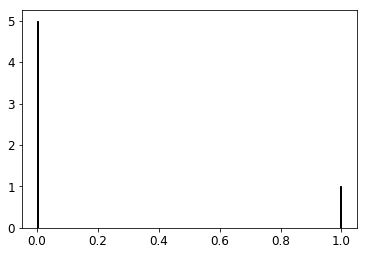

In [92]:
img=mpimg.imread('gear_images/axes/10036053x1012980_zm_new.jpeg')
plt.hist(img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

## Challenge 3

In [97]:
from sklearn import datasets

#### Make image to array

In [102]:
import numpy as np
import matplotlib.pylab as plt

im = plt.imread("gear_images/hardshell_jackets/10184183x1012360_zm.jpeg")
arr = np.array(im)

arr.shape

(400, 287, 3)

#### Make it to function 

In [120]:
import numpy as np
import matplotlib.pylab as plt

img = "gear_images/hardshell_jackets/10184184x1061637_zm_new.jpeg"
## need to use the new images

def toarray(img):
    im = plt.imread(img)
    arr = np.array(im)
    length = arr.shape[0]
    new_arr = arr.reshape((length*length*3))
    return new_arr

toarray(img)

array([255, 255, 255, ..., 252, 255, 255], dtype=uint8)

In [ ]:
import os
for subdir, dirs, files in os.walk("gear_images/"):
    for file in files:
        #print os.path.join(subdir, file)
        if file.endswith("_new.jpeg"):
            filepath = subdir + os.sep + file
            img = filepath
            train = np.append(train,toarray(img))
train.shape

In [121]:
import pandas as pd
temp1 = pd.DataFrame(toarray(img))
temp1.describe()

,0
count,49152.000000
mean,160.220968
std,102.676974
min,0.000000
25%,50.000000
50%,252.000000
75%,255.000000
max,255.000000


#### Getting folder name as label

In [ ]:
import os
path=os.path.dirname("C:/folder1/folder2/filename.xml")
os.path.basename(path)

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import os

class Gear(object):
    def __init__(self, Gear, Gear_type):
        self.Gear = Gear
        self.Gear_type = Gear_type
 
AW_Gear = [Gear("axes", 0), Gear("boots",1 ),Gear("carabiners", 2), Gear("crampons",3 ),Gear("gloves", 4),
           Gear("hardshell_jackets",5 ),Gear("harnesses", 6), Gear("helmets",7 ),Gear("insulated_jackets",8 ),
           Gear("pulleys", 9), Gear("rope",10 ), Gear("tents",11 )]
Gear_type = dict([ (p.Gear, p.Gear_type) for p in AW_Gear ])

def toarray(img):
    im = plt.imread(img)
    arr = np.array(im)
    length = arr.shape[0]
    new_arr = arr.reshape((length*length*3))
    return new_arr

trainx = np.array([])
trainy = np.array([])

for subdir, dirs, files in os.walk("gear_images/"):
    for file in files:
        #print os.path.join(subdir, file)
        if file.endswith("_new.jpeg"):
            filepath = subdir + os.sep + file
            imgx = filepath
            trainx = np.append(trainx,toarray(imgx))
            imgy = os.path.basename(os.path.dirname(filepath))
            trainy = np.append(trainy,Gear_type[imgy])
         
X = trainx.reshape(2121,49152)  ##104251392/(128*128*3)=2121.0
np.save('XTrain.npy',X)   

Y = trainy.reshape(2121,1)
np.save('YTrain.npy',Y)           

### Load and split data

In [142]:
x=np.load("XTrain.npy")
x.shape

(2121, 49152)

In [143]:
y=np.load("YTrain.npy")
y.shape

(2121, 1)

In [144]:
from sklearn.model_selection import train_test_split

x_train_set, x_test_set = train_test_split(x, test_size=0.2, random_state=42)

In [145]:
from sklearn.model_selection import train_test_split

y_train_set, y_test_set = train_test_split(y, test_size=0.2, random_state=42)

In [146]:
y_train_set.shape, y_test_set.shape

((1696, 1), (425, 1))

### Dump into model

In [153]:
from sklearn import svm
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(x_train_set, y_train_set)

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [154]:
y_pred_set = svm_clf.predict(x_test_set)

In [155]:
y_pred_set

array([ 6., 12.,  5., 10.,  6., 11.,  9.,  6.,  3.,  6., 11.,  6.,  7.,
        1.,  6.,  2.,  5.,  5.,  9.,  6.,  6.,  3., 11.,  4.,  7.,  4.,
        5.,  8.,  3.,  6.,  6.,  9.,  3.,  6.,  6.,  3.,  6.,  3.,  9.,
        9.,  9.,  2.,  9.,  2., 11.,  3., 12.,  7.,  3.,  4.,  6.,  9.,
        5.,  4., 11., 10.,  7.,  6., 11.,  3.,  4.,  9.,  9.,  9.,  2.,
        5., 12.,  4.,  6.,  6.,  9.,  9.,  3.,  7.,  9., 11.,  2.,  5.,
        3.,  6.,  3.,  6.,  6., 11.,  6., 11.,  6.,  9.,  8.,  8.,  6.,
        3.,  6., 10., 12.,  2.,  5., 11.,  3.,  8.,  3.,  4.,  6.,  6.,
        9.,  9.,  5.,  5.,  8.,  3.,  3.,  3., 10., 12.,  6.,  9.,  5.,
        6.,  3.,  9.,  8., 11.,  9.,  2.,  6., 11.,  6.,  7., 11.,  9.,
        3.,  2.,  4.,  3.,  4., 12.,  6.,  5.,  7.,  8.,  1.,  9.,  7.,
        3.,  9., 11.,  9.,  6.,  6.,  6.,  6.,  5., 11.,  8., 12., 11.,
        2.,  1.,  3.,  3., 11.,  5.,  6.,  3., 12.,  6., 12.,  5.,  6.,
        7.,  5., 11.,  7.,  3.,  5.,  6.,  1.,  3.,  6.,  6., 11

#### Check in confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_set, y_pred_set)

#### Determine accuracy %

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_set, y_pred_set)

### Test image

In [ ]:
import numpy as np
from PIL import Image
    
def normalize(img , debug=False):
    """
    Linear normalization
    http://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    """
    arr = np.array(img)

    arr = arr.astype('float')
    # Do not touch the alpha channel
    for i in range(3):
        minval = arr[...,i].min()
        maxval = arr[...,i].max()
        if (debug):
            print("Min" + str(i) + "= " + str(minval))
            print("Max" + str(i) + "= " + str(maxval))
        if minval != maxval:
            arr[...,i] -= minval
            arr[...,i] *= (255.0/(maxval-minval))
    new_img = Image.fromarray(arr.astype('uint8'),'RGB')
    return new_img

def reshape(filepath):
    desired_size = 128
    im_pth = filepath

    im = Image.open(im_pth)
    old_size = im.size  # old_size[0] is in (width, height) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    # use thumbnail() or resize() method to resize the input image

    # thumbnail is a in-place operation

    # im.thumbnail(new_size, Image.ANTIALIAS)

    im = im.resize(new_size, Image.ANTIALIAS)
    # create a new image and paste the resized on it

    new_im = Image.new("RGB", (desired_size, desired_size), color='White')
    new_im.paste(im, ((desired_size-new_size[0])//1,
                        (desired_size-new_size[1])//1))

    new_im.show()
    new_im_reshaped = normalize(new_im)
    new_im_reshaped.save(filepath[:-5]+'_new'+'.jpeg')
    
reshape("classify_image.jpeg")

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import os

def toarray(img):
    im = plt.imread(img)
    arr = np.array(im)
    length = arr.shape[0]
    new_arr = arr.reshape((length*length*3))
    return new_arr

testx = toarray("classify_image_new.jpeg")
testx.shape

In [ ]:
image_test = clf.predict([testx])

In [ ]:
AW_Gear[int(image_test[0])-1].Gear

# Challenge 4 Deep Learning

In [157]:
from keras.models import Sequential

model = Sequential()

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [158]:
from keras.layers import Dense

model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))

In [159]:
### Kernel size should be odds
# keras.layers.Flatten always need before Dense Layer

#Hint: For better accuracy, can add more data, by adding transformaed image (such as rotaded)

# label 0 to 11 should be trade as categorial, in steaded of intergers
# or do one-hot-coding

#Convolution is take such as 3*3 adding weight
#Pooling 

# Conv2D (*,) this number always increases

# categorial_crossentropy is the lost function


In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pylab as plt
import os

x = np.load('XTrain.npy').astype('float32')
y = np.load('YTrain.npy').astype('float32')
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(x, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

In [ ]:
batch_size = 128
num_classes = 12
epochs = 20

# input image dimensions
img_rows, img_cols = 128, 128

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])



In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
## for rotation:
## https://d4nst.github.io/2017/01/12/image-orientation/

In [ ]:
 model.fit(x_train, y_train, epochs=20, batch_size=20, validation_data=(x_test,y_test))

## Challenge 5: Detecting Safety


#### Getting images

In [ ]:
from PIL import Image
import requests
from io import BytesIO

with open('summit_post_urls_selected.txt') as f:
    lines = f.readlines() 
    response = requests.get(lines)
    img = Image.open(BytesIO(response.content))
    
    
with open('summit_post_urls_selected.txt')) as file:
    csvrows = csv.reader(file, delimiter=',', quotechar='"')
    for row in csvrows:
        filename = row[0]
        url = row[1]
        print(url)
        result = requests.get(url, stream=True)
        if result.status_code == 200:
            image = result.raw.read()
            open(filename,"wb").write(image)

In [ ]:
wget -i https://challenge.blob.core.windows.net/challengefiles/summit_post_urls_selected.txt